<a href="https://colab.research.google.com/github/Phuc0417/AI_2023/blob/main/NguyenHoangPhuc_20146417(ProtFIS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=dff1a48bdb12094db4a417b40ee5008c70675b01bef06092ae69a192069842b7
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


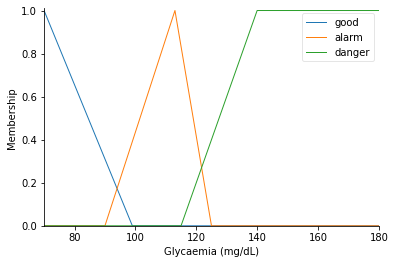

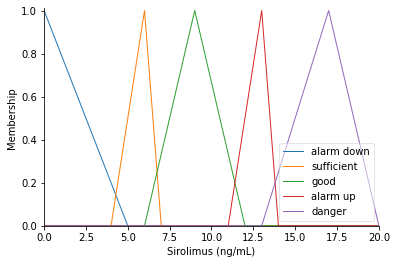

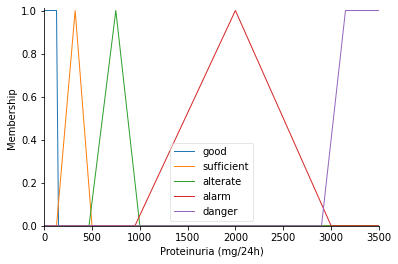

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 


Glycaemia_Level = ctrl.Antecedent(np.arange(70,180.1,1),'Glycaemia (mg/dL)')
Sirolimus_Level = ctrl.Antecedent(np.arange(0,20.1,1),'Sirolimus (ng/mL)')
Proteinuria_Level = ctrl.Consequent(np.arange(0,3500.1,1),'Proteinuria (mg/24h)')

Glycaemia_Level['good'] = fuzz.trimf(Glycaemia_Level.universe,[70,70,99])
Glycaemia_Level['alarm'] = fuzz.trimf(Glycaemia_Level.universe,[90,113,125])
Glycaemia_Level['danger'] = fuzz.trapmf(Glycaemia_Level.universe,[115,140,180,180])

Sirolimus_Level['alarm down'] = fuzz.trimf(Sirolimus_Level.universe,[0,0,5])
Sirolimus_Level['sufficient'] = fuzz.trimf(Sirolimus_Level.universe,[4,6,7])
Sirolimus_Level['good'] = fuzz.trimf(Sirolimus_Level.universe,[6,9,12])
Sirolimus_Level['alarm up'] = fuzz.trimf(Sirolimus_Level.universe,[11,13,14])
Sirolimus_Level['danger'] = fuzz.trimf(Sirolimus_Level.universe,[13,17,20])

Proteinuria_Level['good'] = fuzz.trapmf(Proteinuria_Level.universe,[0,0,130,150])
Proteinuria_Level['sufficient'] = fuzz.trimf(Proteinuria_Level.universe,[130,325,500])
Proteinuria_Level['alterate'] = fuzz.trimf(Proteinuria_Level.universe,[470,750,1000])
Proteinuria_Level['alarm'] = fuzz.trimf(Proteinuria_Level.universe,[950,2000,3000])
Proteinuria_Level['danger'] = fuzz.trapmf(Proteinuria_Level.universe,[2900,3150,3500,3500])


Glycaemia_Level.view()
Sirolimus_Level.view()
Proteinuria_Level.view()

In [3]:
# follow table 1:
rule1 = ctrl.Rule(Glycaemia_Level['good'] & Sirolimus_Level['good'], Proteinuria_Level['good'])
rule2 = ctrl.Rule(Glycaemia_Level['danger'] & Sirolimus_Level['danger'], Proteinuria_Level['danger'])
rule3 = ctrl.Rule(Glycaemia_Level['good'] & Sirolimus_Level['sufficient'], Proteinuria_Level['sufficient'])
rule4 = ctrl.Rule(Glycaemia_Level['alarm'] & Sirolimus_Level['alarm up'], Proteinuria_Level['alarm'])
rule5 = ctrl.Rule(Glycaemia_Level['alarm'] & Sirolimus_Level['sufficient'], Proteinuria_Level['alterate'])
rule6 = ctrl.Rule(Glycaemia_Level['good'] & Sirolimus_Level['alarm up'], Proteinuria_Level['alterate'])
rule7 = ctrl.Rule(Glycaemia_Level['alarm'] & Sirolimus_Level['good'], Proteinuria_Level['sufficient'])
rule8 = ctrl.Rule(Glycaemia_Level['good'] & Sirolimus_Level['alarm down'], Proteinuria_Level['sufficient'])

Proteinuria_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,
                                   rule8])

Proteinuria = ctrl.ControlSystemSimulation(Proteinuria_ctrl)


316.8333333333322


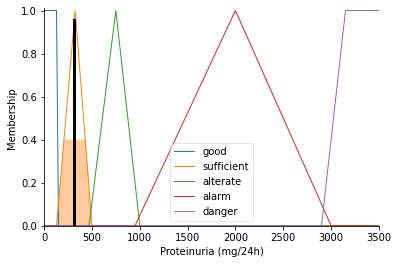

In [4]:
Proteinuria.input['Glycaemia (mg/dL)'] = 70
Proteinuria.input['Sirolimus (ng/mL)'] = 3
Proteinuria.compute()
print(Proteinuria.output['Proteinuria (mg/24h)'])
Proteinuria_Level.view(sim=Proteinuria)